In [2]:
import os
import sys
import tarfile
import shutil
import random
import numpy as np

import matplotlib.pyplot as plt

import torch
from torchvision.datasets import CIFAR100, ImageFolder
from torch.utils.data import DataLoader, Dataset, DistributedSampler, random_split
from torchvision.transforms import transforms, Compose

In [2]:
import datapipeline

In [164]:
class DataPipeLine:
    def __init__(self, dataClass:Dataset, path="dataset", download=True, image_shape=(64, 64), batch_size=1024, prefetch_factor=2,\
                 num_workers=4, pin_memory=True,transform=None, valid_transform=None) :
    
    
        self.path = path
        self.dataClass = dataClass
        self.img_shape = image_shape
        self.batch_size = batch_size
        self.prefetch_factor = prefetch_factor
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        
        
        self.trainDatasetInstance = None
        self.trainset_length = 0
        
        self.testDatasetInstance = None
        self.testset_length = 0
    
        self.validDatasetInstance = None
        self.validset_length = 0
        
        self.transform = transform
        if self.transform == None:
            self.transform = transforms.Compose([transforms.RandomHorizontalFlip(0.4),
                                            transforms.RandomRotation(45),
                                            transforms.RandomAffine(45),
                                            transforms.ToTensor()])
    
        self.valid_transform = valid_transform
        if self.valid_transform == None:
            self.valid_transform = transforms.Compose([transforms.ToTensor()])
            
                
      
        self.validDatasetInstance = None
    
    
    def download(self, down_load=True):
        self.trainDatasetInstance = self.dataClass(root=self.path, download=down_load, train=True, transform=self.transform)
        self.trainset_length = len(self.trainDatasetInstance)
        
        self.testDatasetInstance = self.dataClass(root=self.path, download=down_load, train=False, transform=self.valid_transform)
        self.testset_length = len(self.testDatasetInstance)
    
        print(f"Downloaded | Training set: {self.trainset_length} | Testing set: {self.testset_length}")

    
    def __str__(self):
        return f"Dataset(Train({self.trainset_length}), Test({self.testset_length}), Valid({self.validset_length}))"
        
    def split_dataset(self, split_size=None, on_train_set = True, seed = 42):
    
        if on_train_set:
            _val_length = int(split_size * self.trainset_length)
            _train_length = self.trainset_length - _val_length
    
            self.trainDatasetInstance, self.validDatasetInstance =  random_split(self.trainDatasetInstance, 
                                                                                 [_train_length, _val_length], 
                                                                                 generator=torch.Generator().manual_seed(seed))
    
            self.trainset_length = len(self.trainDatasetInstance)
            self.validset_length = len(self.validDatasetInstance)
    
            print(f"Training Data split into -> Training Data:{self.trainset_length} | Validation Data: {self.validset_length}")
    
        else:
            _val_length = int(split_size * self.testset_length)
            _test_length =  self.testset_length - _val_length
    
            self.testDatasetInstance, self.validDatasetInstance =  random_split(self.trainDatasetInstance, 
                                                                                 [_test_length, _val_length], 
                                                                                 generator=torch.Generator().manual_seed(self.seed))
    
            self.testset_length = len(self.trainDatasetInstance)
            self.validset_length = len(self.validDatasetInstance)
    
            print(f"Testing Data split into -> Training Data:{self.testset_length} | Validation Data: {self.validset_length}")
    
    def load_data(self, loader_type='train', sampler=None, collate_fn=None):
    
         if loader_type in ['train', 'training', 'trainset', 'training dataset']:
             _temp_dataset = self.trainDatasetInstance
         elif loader_type in ['test', 'testing', 'testset', 'testing dataset']:
             _temp_dataset = self.testDatasetInstance
         else:
             _temp_dataset = self.validDatasetInstance
             
         _shuffle = True
         if sampler:
             _temp_dataset = sampler(self.trainDatasetInstance)
             _shuffle = False
             
         dataloader = DataLoader(_temp_dataset, batch_size = self.batch_size, shuffle=_shuffle, num_workers=min(4, os.cpu_count()),\
                                 prefetch_factor=self.prefetch_factor, pin_memory=self.pin_memory, collate_fn=collate_fn)
    
         return dataloader

    def plot_img(self, **kwargs):
        image = None
        label = None
        ax = plt

        if kwargs:
            if kwargs.get("sample"):
                image, label = sample
            else:
                image = kwargs['image']
                label = kwargs['label']

            if kwargs.get("ax"):
                ax = kwargs['ax']

        image = image.permute(1, 2, 0)
        image = image.clamp(0, 1)
        ax.imshow(img)
        ax.axis("off")
        ax.title(f"Image label: {label}")
        plt.show();

    @staticmethod
    def factor(n):
        _temp = torch.arange(2, n)
        _temp = _temp[n%_temp == 0]
        
        return _temp
        
        

    def plot_batch(self, batch):
        _temp = factor(batch)
        _size = _temp.shape[0]
        _idx_fn = lambda x: (x//2 + x)//2
        _idx = _idx_fn(_size)
        
        for i in range(int(_size/_temp[_idx].item())):
            _arr = factor(_temp[_idx])
            _ix = _idx_fn(_arr.shape[0])
            x = _arr[_ix]
            y = _temp[idx]//x
            
            fig, axes = plt.suplot(x, y, figsize=(10, 15)

            for ax, sample in zip(axes.flatten(), batch

        

        
        

In [165]:
dpl = DataPipeLine(CIFAR100)

In [166]:
dpl.download()

Downloaded | Training set: 50000 | Testing set: 10000


In [167]:
print(dpl)

Dataset(Train(50000), Test(10000), Valid(0))


In [168]:
dpl.split_dataset(0.2)

Training Data split into -> Training Data:40000 | Validation Data: 10000


In [169]:
train_loader = dpl.load_data(loader_type='train')

In [82]:
assert torch.cuda.is_available()

In [107]:
txt = next(iter(train_loader))

In [112]:
len(txt)

2

In [111]:
torch.utils.bottleneck()

AttributeError: module 'torch.utils' has no attribute 'bottleneck'

In [124]:
def func(**kwargs):
    sample = kwargs.get('sample')
    print(sample)

In [125]:
func()

None


In [185]:
imgs = txt[0][1], txt[1][1]

In [186]:
imgs

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor(68))

In [193]:
x, y = imgs

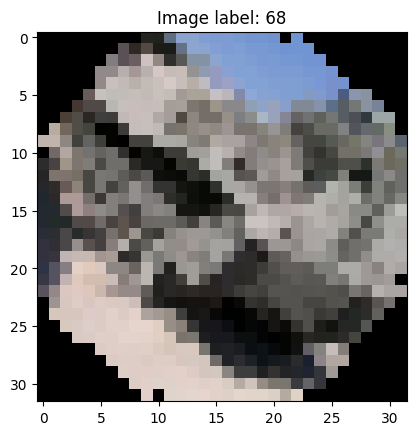

In [197]:
dpl.plot_img(image=x, label=y, sample=None, ax=None)

In [204]:
k = torch.arange(2, 1024)
k.size()[0]

1022

In [201]:
[k[1024 % k == 0].shpae

AttributeError: 'Tensor' object has no attribute 'shpae'

In [205]:
1024/256

4.0

In [211]:
k[-2].item()

1022